## Ep. 3 - Marketing Mix Modeling: Learning Algorithm on EXCEL


https://www.youtube.com/watch?v=KUdNxYuAlfg

https://docs.google.com/spreadsheets/d/1FjXCiEI1yXUA825rkt-Hg_9Ry_dcI1YrkmxLYSJBhT0/edit?pli=1&gid=1503650850#gid=1503650850

In [20]:
import pandas as pd
# Ler a primeira aba (índice 0)
df = pd.read_excel('../MARKETING MIX MODELING YT.xlsx', sheet_name=0)

df

,Time,sales,FB,TV,Radio,Date
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    30 non-null     object        
 1   sales   30 non-null     float64       
 2   FB      30 non-null     float64       
 3   TV      30 non-null     float64       
 4   Radio   30 non-null     float64       
 5   Date    30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.5+ KB


# Criando um simples modelo

# modelo de linear regressão 

In [22]:
import pandas as pd
import statsmodels.api as sm

# Definindo a variável dependente e as variáveis independentes
X = df[['FB', 'TV', 'Radio']]  # Variáveis independentes
y = df['sales']  # Variável dependente

# Adicionando uma constante para o modelo
X = sm.add_constant(X)

# Criando o modelo de regressão
model = sm.OLS(y, X).fit()

# Imprimindo o resumo da regressão
print(model.summary())
# Obter o intercepto
intercept = model.params[0]  # O primeiro valor é o intercepto
print(f"Intercept: {intercept:.2f}")


# Obter e imprimir os coeficientes
coeficientes = model.params
print("\nCoeficientes do modelo:")
for variable, coef in coeficientes.items():
    print(f"{variable}: {coef:.2f}")
coeficientes_4 = model.params.to_dict()  # Converte os coeficientes para dicionário
coeficientes_4

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     67.94
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.97e-12
Time:                        08:44:23   Log-Likelihood:                -57.368
No. Observations:                  30   AIC:                             122.7
Df Residuals:                      26   BIC:                             128.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0104      0.879      3.423      0.0

/tmp/ipykernel_7481/1214039600.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]  # O primeiro valor é o intercepto


{'const': 3.0103791680812657,
 'FB': 0.04632654836595186,
 'TV': 0.19856923152114442,
 'Radio': -0.018892187292189933}

Usamos o Coef

In [23]:
import numpy as np

# Obter o valor de R²
r_squared = model.rsquared
print(f"R²: {r_squared:.2f}")

# Calcular o RMSE
predictions = model.predict(X)  # Previsões do modelo
rmse = np.sqrt(np.mean((predictions - y) ** 2))  # RMSE
print(f"RMSE: {rmse:.2f}")

R²: 0.89
RMSE: 1.64


# y=b1x1+b2x2+b3x3+b0

In [24]:
import pandas as pd
import statsmodels.api as sm

# rodar novamente, agora sem o rádio
# Definindo a variável dependente e as variáveis independentes
X = df[['FB', 'TV']]  # Variáveis independentes
y = df['sales']  # Variável dependente

# Adicionando uma constante para o modelo
X = sm.add_constant(X)

# Criando o modelo de regressão
model = sm.OLS(y, X).fit()

# Imprimindo o resumo da regressão
print(model.summary())


# Obter o valor de R²
r_squared = model.rsquared
print(f"R²: {r_squared:.2f}")

# Calcular o RMSE
predictions = model.predict(X)  # Previsões do modelo
rmse = np.sqrt(np.mean((predictions - y) ** 2))  # RMSE
print(f"RMSE: {rmse:.2f}")

# Obter o intercepto
intercept = model.params[0]  # O primeiro valor é o intercepto
print(f"Intercept: {intercept:.2f}")
# Obter e imprimir os coeficientes
coeficientes = model.params
print("\nCoeficientes do modelo:")
for variable, coef in coeficientes.items():
    print(f"{variable}: {coef:.2f}")
coeficientes_3 = model.params.to_dict()  # Converte os coeficientes para dicionário
coeficientes_3

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     100.2
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.21e-13
Time:                        08:44:23   Log-Likelihood:                -58.092
No. Observations:                  30   AIC:                             122.2
Df Residuals:                      27   BIC:                             126.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7567      0.855      3.225      0.0

/tmp/ipykernel_7481/3862195980.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]  # O primeiro valor é o intercepto


{'const': 2.75671575962732,
 'FB': 0.046826506629567166,
 'TV': 0.17680550689962377}

In [25]:
calculo_simples = df.copy()
display(calculo_simples)


,Time,sales,FB,TV,Radio,Date
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10


In [26]:
coeficientes_4['const']

3.0103791680812657

## y=b1x1+b2x2+b3x3+b0

In [27]:
calculo_simples['Pred with Radio'] = coeficientes_4['const'] + coeficientes_4['FB'] * calculo_simples['FB'] + coeficientes_4['TV'] * calculo_simples['TV'] +  coeficientes_4['Radio'] * calculo_simples['Radio']

In [28]:
calculo_simples

,Time,sales,FB,TV,Radio,Date,Pred with Radio
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,19.868696
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,12.023644
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,11.612295
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,17.124568
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,12.427463
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,11.706542
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,11.743260
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,12.251638
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,3.806891
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,12.382189


In [29]:
calculo_simples['Pred No Radio'] = coeficientes_3['const'] + coeficientes_3['FB'] * calculo_simples['FB'] + coeficientes_3['TV'] * calculo_simples['TV'] 

In [30]:
calculo_simples

,Time,sales,FB,TV,Radio,Date,Pred with Radio,Pred No Radio
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,19.868696,20.214743
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,12.023644,11.788952
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,11.612295,11.677504
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,17.124568,17.152999
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,12.427463,13.132448
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,11.706542,11.809896
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,11.743260,11.248461
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,12.251638,11.850650
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,3.806891,3.530715
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,12.382189,12.572346


In [31]:
calculo_simples['error radio'] = abs(calculo_simples['sales']- calculo_simples['Pred with Radio'])

In [32]:
calculo_simples

,Time,sales,FB,TV,Radio,Date,Pred with Radio,Pred No Radio,error radio
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,19.868696,20.214743,2.231304
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,12.023644,11.788952,1.623644
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,11.612295,11.677504,2.312295
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,17.124568,17.152999,1.375432
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,12.427463,13.132448,0.472537
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,11.706542,11.809896,4.506542
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,11.743260,11.248461,0.056740
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,12.251638,11.850650,0.948362
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,3.806891,3.530715,0.993109
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,12.382189,12.572346,1.782189


In [33]:
calculo_simples['Errors no radio'] = abs(calculo_simples['sales']- calculo_simples['Pred No Radio'])

In [34]:
calculo_simples

,Time,sales,FB,TV,Radio,Date,Pred with Radio,Pred No Radio,error radio,Errors no radio
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,19.868696,20.214743,2.231304,1.885257
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,12.023644,11.788952,1.623644,1.388952
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,11.612295,11.677504,2.312295,2.377504
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,17.124568,17.152999,1.375432,1.347001
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,12.427463,13.132448,0.472537,0.232448
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,11.706542,11.809896,4.506542,4.609896
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,11.743260,11.248461,0.056740,0.551539
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,12.251638,11.850650,0.948362,1.349350
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,3.806891,3.530715,0.993109,1.269285
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,12.382189,12.572346,1.782189,1.972346


In [35]:
Media_erroNO_RADIO =calculo_simples['Errors no radio'].mean()

Media_erro_RADIO= calculo_simples['error radio'].mean()


print('Média Error Radio :{}'.format(Media_erro_RADIO))
print('Média Errors no Radio :{}'.format(Media_erroNO_RADIO))



Média Error Radio :1.320297972777573
Média Errors no Radio :1.3527807279982533


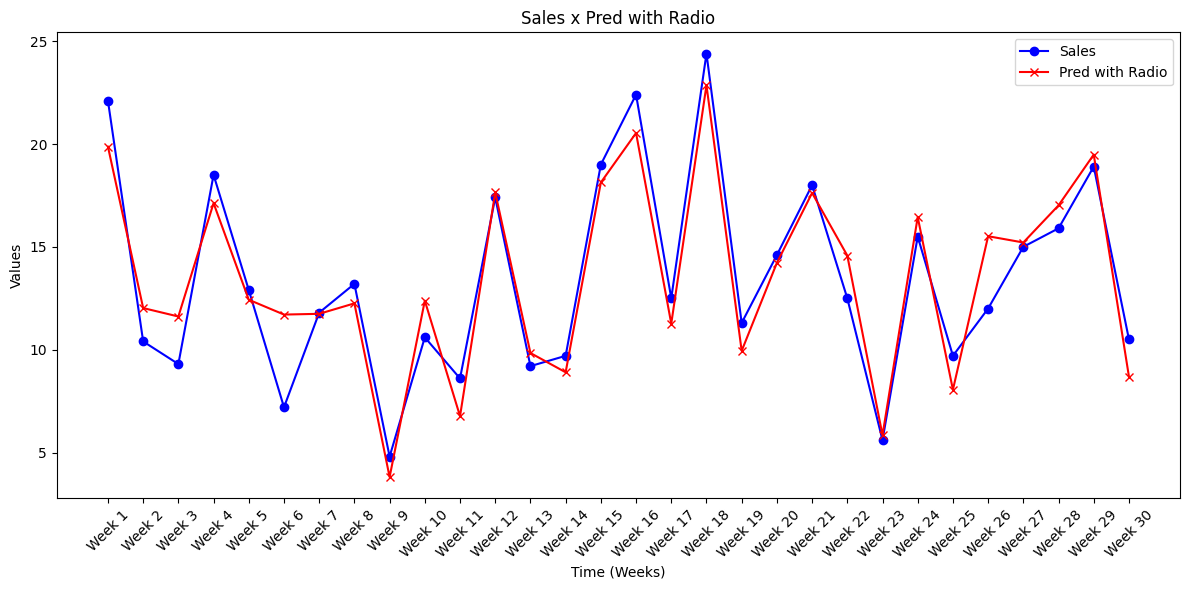

In [36]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(calculo_simples["Time"], calculo_simples["sales"], marker='o', color='b', label="Sales")
plt.plot(calculo_simples["Time"], calculo_simples["Pred with Radio"], marker='x', color='r', label="Pred with Radio")



# Melhorar a visualização
plt.xticks(rotation=45)
plt.xlabel("Time (Weeks)")
plt.ylabel("Values")
plt.title("Sales x Pred with Radio")
plt.legend()
plt.tight_layout()  # Para ajustar os rótulos automaticamente

plt.show()

In [37]:
print('A média do Erro geral da previsão de vendas é de {}'.format(calculo_simples['error radio'].mean()))

print('A média das vendas (sales) é {}'.format(calculo_simples['sales'].mean()))

print('A porcentatem do Erro é de {:.4f} %'.format((calculo_simples['error radio'].mean()/calculo_simples['sales'].mean())*100))

A média do Erro geral da previsão de vendas é de 1.320297972777573
A média das vendas (sales) é 13.449999999999998
A porcentatem do Erro é de 9.8163 %
